In [16]:
# Import all necessary libraries.
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [17]:
# Define a seed.
seed = 42
# Reset the PN sequence generator.
np.random.seed(seed)
random.seed(seed)

In [18]:
# Number of examples.
N = 1000

# Create a 2-class dataset for classification.
centers = [[-3.0, 0], [0, 1.0]]
X, y = make_blobs(n_samples=N, centers=centers, random_state=seed)

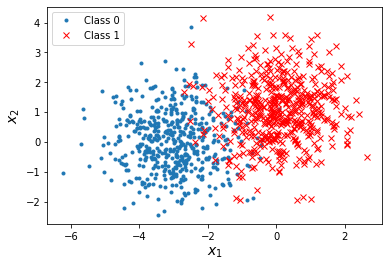

In [19]:
# Plot the classes.
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
fig = plt.figure()
plt.plot(X[idx0,0], X[idx0,1], '.', label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.show()

In [20]:
# Split array into random train and test subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Add bias to feature matrix.
X_train = np.c_[np.ones((len(y_train), 1)), X_train]

# Add bias to feature matrix.
X_test = np.c_[np.ones((len(y_test), 1)), X_test]

In [27]:
clf = Perceptron(n_iter_no_change=10, random_state=seed)

clf.fit(X_train, y_train)

print(clf.n_iter_)

11


In [22]:
# Calculate accuracy of class predictions.
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print('Acurácia:',acc)

Acurácia: 0.9333333333333333


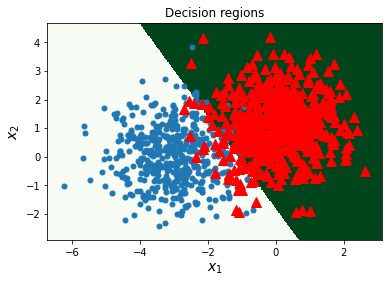

In [23]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# This attribute matrix must also follow the same shape 
# as the one created for the training.
attribute_matrix = np.c_[np.ones((len(xx.ravel()), 1)), xx.ravel(), yy.ravel()]

Z = clf.predict(attribute_matrix)

# Put the result into a color plot.
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Greens, shading='auto')

# Plot also the training points.
plt.plot(X[idx0,0], X[idx0,1], '.', markersize=10, label='Class 0')
plt.plot(X[idx1,0], X[idx1,1], 'r^', markersize=10, label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Decision regions')

plt.show()